# Homework 5
### ASTROINFORMATICS

https://github.com/astromundus/astroinfo2018/homeworks/HW5.ipynb


## Problem

Below in the notebook is the code that generates Figure 10.17 in the textbook. As it is now, it:
* downloads a dataset of variable stars collected with the [LINEAR](https://en.wikipedia.org/wiki/Lincoln_Near-Earth_Asteroid_Research) telescope,
* selects six of them (as given by the `ids` variable),
* computes the Lomb-Scargle periodogram in the `compute_best_frequencies` function,
* finds the best frequency by looking for the highest peak in the periodiogram, and
* folds the light curves and plots the results.

Either by modifying the code below, or by writing similar code, do the following:

1. Find the frequencies for the first 100 stars in the LINEAR datasets (i.e., those with IDs in `data.ids[:100]`, where `data` is the variable containing the LINEAR dataset as defined below).

2. Compute the periods corresponing to the frequencies above, and plot the histogram of periods using 50 bins in range $0 < T < 25$ hours. What do you observe in the histogram?

3. Generate two 6-panel figures analogous to Figure 10.17, for 6 stars (arbitrarily chosen) from the highest and second highest peak, respectivelly. Comment on (dis)similarities of the two plots and of stars within each plot.

4. EXTRA CREDIT: compute the histogram in #2 for ALL (about 7000) stars in the data set, not just the first 100 (note: this will take a while - on a Mac Pro about 5 hours). Modify the histogram range and bin sizes as needed to bring out the features (clusters) in the data. Comment on differences compared to the 100-star case. Extra credit 20% of this homework! 

In [13]:
# Figure 10.17 code

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.decorators import pickle_results
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Compute the best frequencies
@pickle_results('LINEAR_LS.pkl')
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    for i in ids:
        t, y, dy = data[i].T
        print(" - computing power for %i (%i points)" % (i, len(t)))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        results[i] = [omega, power]

    return results

# plot phased light curves 
def plot_lightcurves(results, ids):
    #------------------------------------------------------------
    # Plot the phased light-curves
    fig = plt.figure(figsize=(5, 6.5))
    fig.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)

    for i in range(len(ids)):
        # get the data and best-fit angular frequency
        t, y, dy = data[ids[i]].T
        omega, power = results[ids[i]]
        omega_best = omega[np.argmax(power)]
        print(" - omega_0 = %.10g" % omega_best)

        # do a fit to the first 4 Fourier components
        mtf = MultiTermFit(omega_best, 4)
        mtf.fit(t, y, dy)
        phase_fit, y_fit, phased_t = mtf.predict(1000, return_phased_times=True)

        # plot the phased data and best-fit curves
        ax = fig.add_subplot(321 + i)
        ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                    lw=1, ms=4, capsize=1.5)
        ax.plot(phase_fit, y_fit, '-b', lw=2)

        ax.set_xlim(0, 1)
        ax.set_ylim(plt.ylim()[::-1])
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))

        ax.text(0.03, 0.04, "ID = %i" % ids[i], ha='left', va='bottom',
                transform=ax.transAxes)
        ax.text(0.03, 0.96, "P = %.2f hr" % (2 * np.pi / omega_best * 24.),
                ha='left', va='top',
                transform=ax.transAxes)

        ylim = ax.get_ylim()
        ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))

        if i < 4:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        if i % 2 == 0:
            ax.set_ylabel('mag')

        if i in (4, 5):
            ax.set_xlabel('phase')

    return fig 

In [14]:
# Load the dataset
data = fetch_LINEAR_sample()

@pickle_results: using precomputed results from 'LINEAR_LS.pkl'
 - omega_0 = 17.21695506
 - omega_0 = 51.10600808
 - omega_0 = 10.20062676
 - omega_0 = 45.55493503
 - omega_0 = 58.44512277
 - omega_0 = 10.82722772


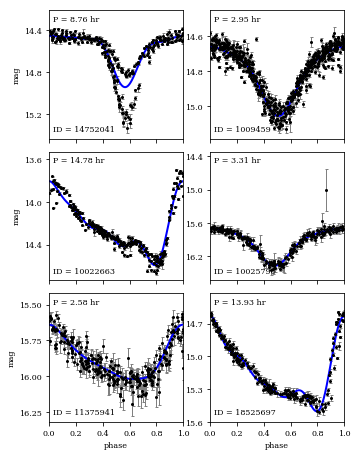

In [15]:
# select a subset of the full dataset
ids = [14752041, 1009459, 10022663, 10025796, 11375941, 18525697]

# Compute the best frequencies
results = compute_best_frequencies(ids, n_eval=10000, n_retry=5)

# Plot the phased light-curves
myprettyplot = plot_lightcurves(results, ids)

## Solution

In [4]:
# select a subset of the full dataset
target = data.ids[:100]

# Compute the best frequencies
results = compute_best_frequencies(target, n_eval=10000, n_retry=5)

@pickle_results: computing results and saving to 'LINEAR_LS.pkl'
    - args match:   False
    - kwargs match: True
 - computing power for 10003298 (196 points)
 - computing power for 10004892 (269 points)
 - computing power for 10013411 (170 points)
 - computing power for 10021274 (214 points)
 - computing power for 10022663 (246 points)
 - computing power for 10025796 (233 points)
 - computing power for 10028253 (38 points)
 - computing power for 10030349 (255 points)
 - computing power for 10032668 (193 points)
 - computing power for 10038903 (227 points)
 - computing power for 10040133 (257 points)
 - computing power for 10040491 (228 points)
 - computing power for 10045187 (229 points)
 - computing power for 10045615 (101 points)
 - computing power for 10046720 (136 points)
 - computing power for 10047498 (221 points)
 - computing power for 1004849 (607 points)
 - computing power for 1005497 (607 points)
 - computing power for 10064356 (291 points)
 - computing power for 10066464 

In [5]:
omega_best = np.zeros(shape=len(target))
for i in range(len(target)):
    # get the data and best-fit angular frequency
    t, y, dy = data[target[i]].T
    omega, power = results[target[i]]
    omega_best[i] = omega[np.argmax(power)]
    #print(" - omega_0 = %.10g" % omega_best[i])

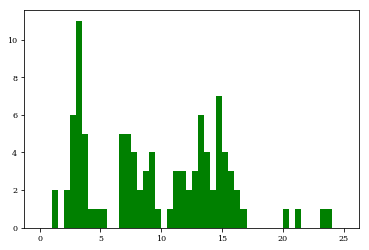

In [6]:
# Plot the histogram of periods
period = 2*np.pi/omega_best*24 
plt.hist(period, bins=50, range=(0,25), color='g');

THe period of these stars can be grouped in three parts. 

@pickle_results: computing results and saving to 'LINEAR_LS.pkl'
    - args match:   False
    - kwargs match: True
 - computing power for 10038903 (227 points)
 - computing power for 10047498 (221 points)
 - computing power for 10264978 (263 points)
 - computing power for 10101561 (137 points)
 - computing power for 10348090 (234 points)
 - computing power for 10357287 (213 points)
 - omega_0 = 12.65024236
 - omega_0 = 12.82060684
 - omega_0 = 59.81063796
 - omega_0 = 44.9335195
 - omega_0 = 47.11060632
 - omega_0 = 49.30259111


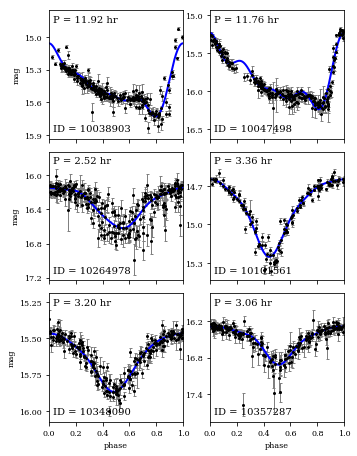

In [7]:
np.random.seed(10)
# Arbitrarily choose 6 stars 
target6 = np.random.choice(target, 6)

# Compute the best frequencies
results = compute_best_frequencies(target6, n_eval=10000, n_retry=5)

# Plot the phased light-curves
myprettyplot = plot_lightcurves(results, target6)

In [8]:
### Extra credit
omega_best = np.zeros(shape=len(data.ids))

results = compute_best_frequencies(data.ids, n_eval=10000, n_retry=5)


@pickle_results: computing results and saving to 'LINEAR_LS.pkl'
    - args match:   False
    - kwargs match: True
 - computing power for 10003298 (196 points)
 - computing power for 10004892 (269 points)
 - computing power for 10013411 (170 points)
 - computing power for 10021274 (214 points)
 - computing power for 10022663 (246 points)
 - computing power for 10025796 (233 points)
 - computing power for 10028253 (38 points)
 - computing power for 10030349 (255 points)
 - computing power for 10032668 (193 points)
 - computing power for 10038903 (227 points)
 - computing power for 10040133 (257 points)
 - computing power for 10040491 (228 points)
 - computing power for 10045187 (229 points)
 - computing power for 10045615 (101 points)
 - computing power for 10046720 (136 points)
 - computing power for 10047498 (221 points)
 - computing power for 1004849 (607 points)
 - computing power for 1005497 (607 points)
 - computing power for 10064356 (291 points)
 - computing power for 10066464 

 - computing power for 10601348 (430 points)
 - computing power for 10606433 (142 points)
 - computing power for 10606728 (409 points)
 - computing power for 10609185 (424 points)
 - computing power for 10614690 (221 points)
 - computing power for 10617428 (203 points)
 - computing power for 10619285 (218 points)
 - computing power for 10623386 (385 points)
 - computing power for 10628913 (345 points)
 - computing power for 10634459 (203 points)
 - computing power for 10642127 (210 points)
 - computing power for 10647040 (383 points)
 - computing power for 10648348 (213 points)
 - computing power for 10650256 (165 points)
 - computing power for 10655343 (240 points)
 - computing power for 10655742 (270 points)
 - computing power for 10660789 (237 points)
 - computing power for 10662289 (262 points)
 - computing power for 10662468 (301 points)
 - computing power for 10664456 (342 points)
 - computing power for 1066477 (147 points)
 - computing power for 10671227 (278 points)
 - computin

 - computing power for 11164967 (204 points)
 - computing power for 11166089 (220 points)
 - computing power for 11175527 (200 points)
 - computing power for 11178050 (215 points)
 - computing power for 11187857 (343 points)
 - computing power for 11202454 (218 points)
 - computing power for 11206727 (253 points)
 - computing power for 11212840 (336 points)
 - computing power for 11214551 (276 points)
 - computing power for 11215595 (338 points)
 - computing power for 1122328 (536 points)
 - computing power for 11224124 (318 points)
 - computing power for 11231236 (146 points)
 - computing power for 11233410 (183 points)
 - computing power for 11236739 (148 points)
 - computing power for 11238522 (147 points)
 - computing power for 1124773 (169 points)
 - computing power for 11248827 (205 points)
 - computing power for 11250867 (182 points)
 - computing power for 11256803 (251 points)
 - computing power for 11265995 (232 points)
 - computing power for 11266154 (249 points)
 - computing

 - computing power for 11843692 (224 points)
 - computing power for 11856290 (303 points)
 - computing power for 11857301 (269 points)
 - computing power for 11863356 (249 points)
 - computing power for 11864180 (236 points)
 - computing power for 11864369 (243 points)
 - computing power for 11864431 (219 points)
 - computing power for 11866538 (265 points)
 - computing power for 11870305 (76 points)
 - computing power for 11872511 (205 points)
 - computing power for 11882477 (198 points)
 - computing power for 11896841 (208 points)
 - computing power for 1190208 (289 points)
 - computing power for 11905739 (206 points)
 - computing power for 11912411 (192 points)
 - computing power for 11917874 (219 points)
 - computing power for 11922992 (193 points)
 - computing power for 11925135 (228 points)
 - computing power for 11929402 (209 points)
 - computing power for 11932308 (243 points)
 - computing power for 11934810 (231 points)
 - computing power for 11935712 (61 points)
 - computing 

 - computing power for 1249142 (417 points)
 - computing power for 12496042 (215 points)
 - computing power for 12502187 (256 points)
 - computing power for 12504572 (404 points)
 - computing power for 12504832 (219 points)
 - computing power for 12505068 (206 points)
 - computing power for 12508478 (213 points)
 - computing power for 12516209 (231 points)
 - computing power for 12517171 (220 points)
 - computing power for 12518025 (195 points)
 - computing power for 12525125 (235 points)
 - computing power for 12526629 (196 points)
 - computing power for 12533027 (167 points)
 - computing power for 12534878 (234 points)
 - computing power for 12536474 (205 points)
 - computing power for 12544799 (161 points)
 - computing power for 12560639 (192 points)
 - computing power for 12561269 (209 points)
 - computing power for 12562559 (219 points)
 - computing power for 12565297 (201 points)
 - computing power for 12566108 (219 points)
 - computing power for 12569794 (193 points)
 - computin

 - computing power for 13063224 (141 points)
 - computing power for 13066028 (190 points)
 - computing power for 13071800 (147 points)
 - computing power for 13077277 (256 points)
 - computing power for 1307948 (262 points)
 - computing power for 1308565 (262 points)
 - computing power for 13087122 (245 points)
 - computing power for 13088404 (258 points)
 - computing power for 13089931 (259 points)
 - computing power for 13093137 (247 points)
 - computing power for 13095415 (254 points)
 - computing power for 13102760 (299 points)
 - computing power for 13103579 (233 points)
 - computing power for 13104605 (275 points)
 - computing power for 13109299 (265 points)
 - computing power for 13112616 (387 points)
 - computing power for 13112627 (239 points)
 - computing power for 13116521 (204 points)
 - computing power for 13119720 (256 points)
 - computing power for 13127606 (205 points)
 - computing power for 13134888 (110 points)
 - computing power for 13135923 (190 points)
 - computing

 - computing power for 13711003 (121 points)
 - computing power for 13711306 (175 points)
 - computing power for 13712985 (205 points)
 - computing power for 13714791 (146 points)
 - computing power for 13715740 (212 points)
 - computing power for 13716218 (103 points)
 - computing power for 13716339 (178 points)
 - computing power for 13716945 (133 points)
 - computing power for 13719041 (196 points)
 - computing power for 1372405 (181 points)
 - computing power for 13732238 (196 points)
 - computing power for 13733154 (212 points)
 - computing power for 13740532 (192 points)
 - computing power for 13740631 (191 points)
 - computing power for 13748458 (175 points)
 - computing power for 1374889 (189 points)
 - computing power for 13752690 (186 points)
 - computing power for 13755234 (201 points)
 - computing power for 13782315 (235 points)
 - computing power for 13789361 (229 points)
 - computing power for 13796841 (179 points)
 - computing power for 13801112 (234 points)
 - computing

 - computing power for 14350834 (230 points)
 - computing power for 14351896 (245 points)
 - computing power for 1435279 (545 points)
 - computing power for 14355066 (249 points)
 - computing power for 14355535 (203 points)
 - computing power for 14358703 (98 points)
 - computing power for 14361000 (254 points)
 - computing power for 14363418 (136 points)
 - computing power for 14372428 (214 points)
 - computing power for 14372790 (235 points)
 - computing power for 14374443 (196 points)
 - computing power for 14384380 (196 points)
 - computing power for 14385018 (192 points)
 - computing power for 14385053 (91 points)
 - computing power for 1438520 (523 points)
 - computing power for 14388219 (232 points)
 - computing power for 14391509 (202 points)
 - computing power for 14392530 (195 points)
 - computing power for 14396814 (205 points)
 - computing power for 14398096 (183 points)
 - computing power for 14400528 (167 points)
 - computing power for 14401783 (191 points)
 - computing p

 - computing power for 14854121 (211 points)
 - computing power for 14865416 (141 points)
 - computing power for 14866961 (204 points)
 - computing power for 14872363 (197 points)
 - computing power for 14879326 (208 points)
 - computing power for 14882819 (206 points)
 - computing power for 14891009 (175 points)
 - computing power for 14892476 (70 points)
 - computing power for 14900115 (218 points)
 - computing power for 14900693 (201 points)
 - computing power for 1490274 (314 points)
 - computing power for 14902930 (203 points)
 - computing power for 14903357 (215 points)
 - computing power for 14907569 (189 points)
 - computing power for 14910000 (206 points)
 - computing power for 14911095 (189 points)
 - computing power for 1491155 (323 points)
 - computing power for 14914913 (91 points)
 - computing power for 14915173 (162 points)
 - computing power for 1491775 (293 points)
 - computing power for 14918387 (245 points)
 - computing power for 1491942 (331 points)
 - computing pow

 - computing power for 15261440 (191 points)
 - computing power for 15263714 (195 points)
 - computing power for 15269598 (185 points)
 - computing power for 15271443 (205 points)
 - computing power for 15281799 (205 points)
 - computing power for 15282342 (156 points)
 - computing power for 15283871 (161 points)
 - computing power for 15284007 (194 points)
 - computing power for 15284973 (192 points)
 - computing power for 15286656 (143 points)
 - computing power for 15287382 (165 points)
 - computing power for 15288375 (160 points)
 - computing power for 15289202 (162 points)
 - computing power for 15289666 (205 points)
 - computing power for 15290674 (184 points)
 - computing power for 15291490 (207 points)
 - computing power for 15293674 (187 points)
 - computing power for 15297171 (179 points)
 - computing power for 15299709 (30 points)
 - computing power for 15302470 (179 points)
 - computing power for 15309363 (159 points)
 - computing power for 15310004 (194 points)
 - computin

 - computing power for 15721740 (205 points)
 - computing power for 15723103 (221 points)
 - computing power for 15724061 (204 points)
 - computing power for 15724616 (209 points)
 - computing power for 15728324 (233 points)
 - computing power for 15732634 (167 points)
 - computing power for 15739880 (231 points)
 - computing power for 15744353 (237 points)
 - computing power for 15748224 (230 points)
 - computing power for 15748251 (230 points)
 - computing power for 15751544 (236 points)
 - computing power for 15756106 (167 points)
 - computing power for 15761861 (184 points)
 - computing power for 15769416 (198 points)
 - computing power for 15777228 (177 points)
 - computing power for 15779995 (202 points)
 - computing power for 15780274 (208 points)
 - computing power for 15780904 (166 points)
 - computing power for 15781893 (180 points)
 - computing power for 15782719 (158 points)
 - computing power for 15784483 (155 points)
 - computing power for 15785272 (195 points)
 - computi

 - computing power for 16218560 (143 points)
 - computing power for 162255 (266 points)
 - computing power for 16235958 (212 points)
 - computing power for 16243512 (171 points)
 - computing power for 16250908 (114 points)
 - computing power for 16251897 (205 points)
 - computing power for 16258664 (213 points)
 - computing power for 16259674 (179 points)
 - computing power for 1626282 (307 points)
 - computing power for 16264955 (220 points)
 - computing power for 16268086 (230 points)
 - computing power for 16275275 (203 points)
 - computing power for 1627564 (317 points)
 - computing power for 16277405 (227 points)
 - computing power for 16277791 (218 points)
 - computing power for 16279008 (195 points)
 - computing power for 16282896 (221 points)
 - computing power for 16283036 (198 points)
 - computing power for 16285874 (201 points)
 - computing power for 16287123 (154 points)
 - computing power for 16288747 (232 points)
 - computing power for 16291191 (204 points)
 - computing p

 - computing power for 16666867 (155 points)
 - computing power for 16669454 (211 points)
 - computing power for 16670893 (195 points)
 - computing power for 1667598 (555 points)
 - computing power for 16680023 (210 points)
 - computing power for 16680195 (210 points)
 - computing power for 16684220 (210 points)
 - computing power for 16692577 (215 points)
 - computing power for 16694484 (142 points)
 - computing power for 16703174 (219 points)
 - computing power for 16703794 (176 points)
 - computing power for 16704626 (208 points)
 - computing power for 16705362 (200 points)
 - computing power for 16707409 (213 points)
 - computing power for 16710177 (209 points)
 - computing power for 16714704 (239 points)
 - computing power for 16715726 (208 points)
 - computing power for 16718769 (204 points)
 - computing power for 16719500 (199 points)
 - computing power for 16726633 (196 points)
 - computing power for 16728832 (198 points)
 - computing power for 16730714 (214 points)
 - computin

 - computing power for 17342686 (270 points)
 - computing power for 17342857 (232 points)
 - computing power for 17351801 (310 points)
 - computing power for 1735658 (547 points)
 - computing power for 17359449 (272 points)
 - computing power for 1736308 (372 points)
 - computing power for 17370336 (526 points)
 - computing power for 17373195 (504 points)
 - computing power for 17386926 (266 points)
 - computing power for 17388305 (241 points)
 - computing power for 17389083 (207 points)
 - computing power for 17403485 (185 points)
 - computing power for 17404363 (194 points)
 - computing power for 17413648 (161 points)
 - computing power for 17418926 (195 points)
 - computing power for 17419718 (209 points)
 - computing power for 17429661 (218 points)
 - computing power for 17433084 (515 points)
 - computing power for 1743519 (167 points)
 - computing power for 17436807 (496 points)
 - computing power for 174389 (270 points)
 - computing power for 17444609 (489 points)
 - computing po

 - computing power for 17992869 (208 points)
 - computing power for 17993985 (170 points)
 - computing power for 18001184 (219 points)
 - computing power for 18001324 (215 points)
 - computing power for 18003132 (221 points)
 - computing power for 18003140 (220 points)
 - computing power for 18006468 (165 points)
 - computing power for 18008609 (199 points)
 - computing power for 18010252 (219 points)
 - computing power for 18011727 (219 points)
 - computing power for 18020442 (222 points)
 - computing power for 18020957 (371 points)
 - computing power for 18021143 (241 points)
 - computing power for 18024182 (185 points)
 - computing power for 18028053 (147 points)
 - computing power for 18029577 (141 points)
 - computing power for 18029924 (232 points)
 - computing power for 18032651 (180 points)
 - computing power for 18032723 (211 points)
 - computing power for 18034228 (217 points)
 - computing power for 18034354 (227 points)
 - computing power for 18038442 (245 points)
 - computi

 - computing power for 18501055 (132 points)
 - computing power for 18502454 (224 points)
 - computing power for 18504033 (223 points)
 - computing power for 18508280 (199 points)
 - computing power for 18510465 (188 points)
 - computing power for 18512447 (177 points)
 - computing power for 1851295 (317 points)
 - computing power for 18514233 (162 points)
 - computing power for 18515114 (116 points)
 - computing power for 18516711 (126 points)
 - computing power for 18517769 (67 points)
 - computing power for 18524508 (219 points)
 - computing power for 18525697 (211 points)
 - computing power for 1852714 (294 points)
 - computing power for 18527462 (185 points)
 - computing power for 18527878 (215 points)
 - computing power for 18533525 (214 points)
 - computing power for 18535998 (217 points)
 - computing power for 18536264 (185 points)
 - computing power for 18537828 (214 points)
 - computing power for 18541863 (151 points)
 - computing power for 18543464 (202 points)
 - computing 

 - computing power for 18977673 (129 points)
 - computing power for 18980586 (183 points)
 - computing power for 18989676 (62 points)
 - computing power for 18997169 (189 points)
 - computing power for 18997392 (203 points)
 - computing power for 19003918 (183 points)
 - computing power for 19006702 (182 points)
 - computing power for 19008047 (180 points)
 - computing power for 19008895 (167 points)
 - computing power for 19012211 (190 points)
 - computing power for 19013715 (215 points)
 - computing power for 19013854 (183 points)
 - computing power for 190201 (44 points)
 - computing power for 19022038 (216 points)
 - computing power for 19024518 (199 points)
 - computing power for 19029359 (211 points)
 - computing power for 19030478 (198 points)
 - computing power for 19030974 (198 points)
 - computing power for 19031733 (206 points)
 - computing power for 19033183 (202 points)
 - computing power for 19036607 (184 points)
 - computing power for 19038039 (204 points)
 - computing p

 - computing power for 19616394 (148 points)
 - computing power for 19618183 (157 points)
 - computing power for 19620582 (156 points)
 - computing power for 19621282 (188 points)
 - computing power for 19624049 (207 points)
 - computing power for 19630958 (155 points)
 - computing power for 19644291 (207 points)
 - computing power for 19647392 (182 points)
 - computing power for 19648541 (312 points)
 - computing power for 19655048 (221 points)
 - computing power for 19661763 (219 points)
 - computing power for 19668062 (208 points)
 - computing power for 19670874 (161 points)
 - computing power for 19674074 (145 points)
 - computing power for 19675641 (148 points)
 - computing power for 19676971 (202 points)
 - computing power for 19683023 (218 points)
 - computing power for 19686866 (207 points)
 - computing power for 1968997 (260 points)
 - computing power for 19692246 (186 points)
 - computing power for 19695942 (176 points)
 - computing power for 19699379 (204 points)
 - computin

 - computing power for 20067913 (117 points)
 - computing power for 20070149 (221 points)
 - computing power for 20070887 (256 points)
 - computing power for 20071721 (194 points)
 - computing power for 20071890 (220 points)
 - computing power for 20072583 (210 points)
 - computing power for 20072948 (257 points)
 - computing power for 20074218 (257 points)
 - computing power for 20075676 (202 points)
 - computing power for 20075891 (213 points)
 - computing power for 20079092 (256 points)
 - computing power for 20083833 (221 points)
 - computing power for 20092061 (193 points)
 - computing power for 20097614 (143 points)
 - computing power for 20098606 (205 points)
 - computing power for 20099981 (213 points)
 - computing power for 20105424 (215 points)
 - computing power for 20107944 (215 points)
 - computing power for 20121650 (193 points)
 - computing power for 20128903 (207 points)
 - computing power for 20129375 (197 points)
 - computing power for 20132306 (196 points)
 - computi

 - computing power for 20777402 (201 points)
 - computing power for 20785317 (201 points)
 - computing power for 20787947 (141 points)
 - computing power for 2079147 (459 points)
 - computing power for 20794936 (181 points)
 - computing power for 20797457 (182 points)
 - computing power for 20801328 (156 points)
 - computing power for 20804126 (181 points)
 - computing power for 20804594 (67 points)
 - computing power for 20813826 (172 points)
 - computing power for 20815762 (188 points)
 - computing power for 20822204 (185 points)
 - computing power for 20828304 (174 points)
 - computing power for 20829724 (191 points)
 - computing power for 20831083 (195 points)
 - computing power for 20833846 (191 points)
 - computing power for 20837681 (178 points)
 - computing power for 2084640 (523 points)
 - computing power for 20855130 (232 points)
 - computing power for 20858337 (219 points)
 - computing power for 20860892 (180 points)
 - computing power for 20861579 (183 points)
 - computing 

 - computing power for 21452146 (224 points)
 - computing power for 2145400 (349 points)
 - computing power for 21454119 (224 points)
 - computing power for 21460667 (441 points)
 - computing power for 21460890 (496 points)
 - computing power for 21461642 (535 points)
 - computing power for 21468901 (476 points)
 - computing power for 21473837 (606 points)
 - computing power for 21474739 (512 points)
 - computing power for 21480626 (579 points)
 - computing power for 21486032 (524 points)
 - computing power for 2148637 (339 points)
 - computing power for 21486794 (506 points)
 - computing power for 21488669 (473 points)
 - computing power for 2149181 (311 points)
 - computing power for 21492633 (457 points)
 - computing power for 21493809 (492 points)
 - computing power for 21496631 (478 points)
 - computing power for 21500886 (291 points)
 - computing power for 21505266 (290 points)
 - computing power for 21515129 (320 points)
 - computing power for 21516768 (245 points)
 - computing 

 - computing power for 22280880 (375 points)
 - computing power for 22283909 (344 points)
 - computing power for 22285549 (305 points)
 - computing power for 22287451 (327 points)
 - computing power for 2229607 (290 points)
 - computing power for 2230438 (246 points)
 - computing power for 22306983 (304 points)
 - computing power for 2230712 (242 points)
 - computing power for 22309292 (302 points)
 - computing power for 22315266 (545 points)
 - computing power for 22316675 (506 points)
 - computing power for 22317507 (346 points)
 - computing power for 22318468 (527 points)
 - computing power for 22319996 (514 points)
 - computing power for 22322024 (541 points)
 - computing power for 22323193 (515 points)
 - computing power for 22323448 (542 points)
 - computing power for 22338901 (236 points)
 - computing power for 22342092 (231 points)
 - computing power for 22345256 (287 points)
 - computing power for 22346514 (309 points)
 - computing power for 22356134 (185 points)
 - computing 

 - computing power for 23056331 (251 points)
 - computing power for 23071423 (562 points)
 - computing power for 23073893 (563 points)
 - computing power for 23074578 (562 points)
 - computing power for 23076584 (550 points)
 - computing power for 23079661 (541 points)
 - computing power for 23085525 (231 points)
 - computing power for 23085978 (223 points)
 - computing power for 23086777 (258 points)
 - computing power for 23087816 (217 points)
 - computing power for 23091164 (242 points)
 - computing power for 23109894 (174 points)
 - computing power for 23119208 (190 points)
 - computing power for 23121563 (208 points)
 - computing power for 2313352 (241 points)
 - computing power for 23135759 (552 points)
 - computing power for 23140598 (177 points)
 - computing power for 23148132 (567 points)
 - computing power for 23148883 (491 points)
 - computing power for 23150330 (554 points)
 - computing power for 23157611 (453 points)
 - computing power for 23157974 (444 points)
 - computin

 - computing power for 23589682 (94 points)
 - computing power for 23593788 (93 points)
 - computing power for 23594389 (64 points)
 - computing power for 23594608 (80 points)
 - computing power for 23596342 (286 points)
 - computing power for 23598918 (315 points)
 - computing power for 23603002 (315 points)
 - computing power for 23604060 (344 points)
 - computing power for 23614288 (82 points)
 - computing power for 23614798 (84 points)
 - computing power for 23616106 (93 points)
 - computing power for 23620712 (316 points)
 - computing power for 23623155 (308 points)
 - computing power for 23624228 (295 points)
 - computing power for 23625382 (292 points)
 - computing power for 23625796 (323 points)
 - computing power for 2362884 (233 points)
 - computing power for 23630974 (88 points)
 - computing power for 23631134 (65 points)
 - computing power for 23634524 (90 points)
 - computing power for 23637760 (277 points)
 - computing power for 23639331 (261 points)
 - computing power fo

 - computing power for 24136426 (45 points)
 - computing power for 24136755 (152 points)
 - computing power for 24136761 (40 points)
 - computing power for 24139748 (142 points)
 - computing power for 2414841 (522 points)
 - computing power for 24151584 (516 points)
 - computing power for 24153038 (611 points)
 - computing power for 24153314 (180 points)
 - computing power for 24160323 (510 points)
 - computing power for 24163451 (36 points)
 - computing power for 24164684 (161 points)
 - computing power for 24166005 (166 points)
 - computing power for 24168237 (130 points)
 - computing power for 24170603 (521 points)
 - computing power for 24185328 (411 points)
 - computing power for 24191273 (45 points)
 - computing power for 24192071 (570 points)
 - computing power for 24192279 (596 points)
 - computing power for 2419376 (391 points)
 - computing power for 24198561 (236 points)
 - computing power for 24199965 (425 points)
 - computing power for 24203529 (453 points)
 - computing pow

 - computing power for 24776891 (481 points)
 - computing power for 24790990 (509 points)
 - computing power for 24794490 (317 points)
 - computing power for 24796756 (366 points)
 - computing power for 24802462 (499 points)
 - computing power for 24810052 (483 points)
 - computing power for 24810840 (511 points)
 - computing power for 24815070 (506 points)
 - computing power for 24815579 (534 points)
 - computing power for 24815892 (489 points)
 - computing power for 24821042 (506 points)
 - computing power for 24825104 (520 points)
 - computing power for 24827687 (522 points)
 - computing power for 24830025 (465 points)
 - computing power for 24831238 (456 points)
 - computing power for 24834880 (508 points)
 - computing power for 248379 (40 points)
 - computing power for 24843959 (535 points)
 - computing power for 24846965 (512 points)
 - computing power for 24851183 (493 points)
 - computing power for 24858973 (530 points)
 - computing power for 24860724 (489 points)
 - computing 

 - computing power for 2537648 (246 points)
 - computing power for 2542844 (199 points)
 - computing power for 2552794 (502 points)
 - computing power for 2554750 (285 points)
 - computing power for 255658 (289 points)
 - computing power for 255857 (317 points)
 - computing power for 2564971 (512 points)
 - computing power for 2565858 (337 points)
 - computing power for 2566499 (366 points)
 - computing power for 2568913 (439 points)
 - computing power for 2569778 (373 points)
 - computing power for 2574370 (433 points)
 - computing power for 257977 (313 points)
 - computing power for 2581524 (300 points)
 - computing power for 2584911 (336 points)
 - computing power for 258499 (275 points)
 - computing power for 2587263 (310 points)
 - computing power for 2590360 (259 points)
 - computing power for 2593243 (307 points)
 - computing power for 2595739 (327 points)
 - computing power for 2602707 (322 points)
 - computing power for 2602711 (345 points)
 - computing power for 260620 (226 p

 - computing power for 3139572 (275 points)
 - computing power for 3140124 (329 points)
 - computing power for 3140139 (255 points)
 - computing power for 3140682 (181 points)
 - computing power for 3142907 (287 points)
 - computing power for 3149365 (315 points)
 - computing power for 3151678 (280 points)
 - computing power for 3158696 (224 points)
 - computing power for 3159412 (253 points)
 - computing power for 3160442 (260 points)
 - computing power for 3162203 (270 points)
 - computing power for 3163597 (265 points)
 - computing power for 3163945 (282 points)
 - computing power for 3169928 (249 points)
 - computing power for 3170992 (280 points)
 - computing power for 3173279 (241 points)
 - computing power for 3173902 (286 points)
 - computing power for 3176620 (292 points)
 - computing power for 3180880 (401 points)
 - computing power for 3182815 (491 points)
 - computing power for 3183285 (485 points)
 - computing power for 3185905 (479 points)
 - computing power for 3186870 (

 - computing power for 3649421 (359 points)
 - computing power for 3650526 (194 points)
 - computing power for 3663284 (515 points)
 - computing power for 3663882 (486 points)
 - computing power for 3666049 (507 points)
 - computing power for 3668485 (509 points)
 - computing power for 3672628 (474 points)
 - computing power for 3674294 (488 points)
 - computing power for 3675771 (514 points)
 - computing power for 3677748 (317 points)
 - computing power for 3678737 (507 points)
 - computing power for 3680768 (113 points)
 - computing power for 3685402 (505 points)
 - computing power for 3687991 (468 points)
 - computing power for 3688536 (449 points)
 - computing power for 3691007 (341 points)
 - computing power for 3693914 (298 points)
 - computing power for 3696853 (265 points)
 - computing power for 3698797 (253 points)
 - computing power for 3701954 (263 points)
 - computing power for 370327 (576 points)
 - computing power for 370495 (401 points)
 - computing power for 3719046 (24

 - computing power for 4327168 (482 points)
 - computing power for 4329665 (448 points)
 - computing power for 4331112 (478 points)
 - computing power for 433281 (323 points)
 - computing power for 4333766 (295 points)
 - computing power for 4343459 (412 points)
 - computing power for 4343535 (384 points)
 - computing power for 4343791 (346 points)
 - computing power for 4346704 (361 points)
 - computing power for 4346789 (335 points)
 - computing power for 4347489 (374 points)
 - computing power for 4351390 (375 points)
 - computing power for 4354685 (374 points)
 - computing power for 4354765 (392 points)
 - computing power for 4354965 (376 points)
 - computing power for 4355908 (386 points)
 - computing power for 4359545 (278 points)
 - computing power for 4361485 (268 points)
 - computing power for 4363105 (255 points)
 - computing power for 4367103 (375 points)
 - computing power for 4367166 (382 points)
 - computing power for 437483 (316 points)
 - computing power for 4379469 (34

 - computing power for 4978341 (80 points)
 - computing power for 4978435 (601 points)
 - computing power for 4993440 (583 points)
 - computing power for 4993776 (389 points)
 - computing power for 5003874 (367 points)
 - computing power for 5004248 (327 points)
 - computing power for 5011499 (352 points)
 - computing power for 5013159 (375 points)
 - computing power for 5018209 (321 points)
 - computing power for 5023483 (330 points)
 - computing power for 5025418 (286 points)
 - computing power for 5027964 (346 points)
 - computing power for 5030686 (382 points)
 - computing power for 5032915 (349 points)
 - computing power for 5036648 (357 points)
 - computing power for 5037095 (340 points)
 - computing power for 5037484 (376 points)
 - computing power for 5037547 (347 points)
 - computing power for 5037593 (340 points)
 - computing power for 50402 (284 points)
 - computing power for 5042578 (319 points)
 - computing power for 5050342 (358 points)
 - computing power for 5051151 (345

 - computing power for 5646132 (401 points)
 - computing power for 5648149 (557 points)
 - computing power for 5649548 (560 points)
 - computing power for 5652736 (546 points)
 - computing power for 565638 (234 points)
 - computing power for 565920 (238 points)
 - computing power for 5663644 (425 points)
 - computing power for 566615 (202 points)
 - computing power for 5669410 (374 points)
 - computing power for 5673844 (310 points)
 - computing power for 5680190 (342 points)
 - computing power for 5686075 (162 points)
 - computing power for 569135 (226 points)
 - computing power for 5692103 (375 points)
 - computing power for 5694103 (232 points)
 - computing power for 5695743 (47 points)
 - computing power for 5698396 (33 points)
 - computing power for 5699257 (227 points)
 - computing power for 5702258 (196 points)
 - computing power for 5707807 (313 points)
 - computing power for 571184 (221 points)
 - computing power for 5717214 (269 points)
 - computing power for 5719608 (274 poi

 - computing power for 6164749 (206 points)
 - computing power for 6169696 (286 points)
 - computing power for 6178367 (253 points)
 - computing power for 6178586 (306 points)
 - computing power for 6184078 (296 points)
 - computing power for 6184914 (276 points)
 - computing power for 6185424 (288 points)
 - computing power for 6185920 (61 points)
 - computing power for 6187529 (282 points)
 - computing power for 6196048 (256 points)
 - computing power for 6196864 (273 points)
 - computing power for 6202771 (245 points)
 - computing power for 6203592 (229 points)
 - computing power for 6203836 (308 points)
 - computing power for 6204236 (304 points)
 - computing power for 621395 (442 points)
 - computing power for 6216702 (214 points)
 - computing power for 6225979 (185 points)
 - computing power for 6226117 (188 points)
 - computing power for 6231902 (217 points)
 - computing power for 6235138 (46 points)
 - computing power for 6240115 (181 points)
 - computing power for 6240176 (181

 - computing power for 6729261 (625 points)
 - computing power for 6737498 (580 points)
 - computing power for 6739098 (579 points)
 - computing power for 6742426 (598 points)
 - computing power for 6747445 (613 points)
 - computing power for 6748413 (567 points)
 - computing power for 6752616 (604 points)
 - computing power for 675455 (279 points)
 - computing power for 6756657 (599 points)
 - computing power for 6762440 (485 points)
 - computing power for 6765858 (411 points)
 - computing power for 6777823 (544 points)
 - computing power for 677788 (347 points)
 - computing power for 6778827 (38 points)
 - computing power for 678066 (362 points)
 - computing power for 6791882 (318 points)
 - computing power for 6793815 (379 points)
 - computing power for 6801367 (234 points)
 - computing power for 6803937 (301 points)
 - computing power for 6805826 (314 points)
 - computing power for 6819457 (325 points)
 - computing power for 6822237 (296 points)
 - computing power for 6831710 (310 

 - computing power for 7449961 (562 points)
 - computing power for 7450622 (606 points)
 - computing power for 74545 (192 points)
 - computing power for 7455952 (504 points)
 - computing power for 7466829 (517 points)
 - computing power for 746911 (219 points)
 - computing power for 747079 (330 points)
 - computing power for 7471929 (641 points)
 - computing power for 7475626 (680 points)
 - computing power for 7477110 (606 points)
 - computing power for 7481696 (598 points)
 - computing power for 7491132 (654 points)
 - computing power for 7510192 (561 points)
 - computing power for 7519479 (560 points)
 - computing power for 7526955 (205 points)
 - computing power for 7528221 (202 points)
 - computing power for 7532224 (264 points)
 - computing power for 7535651 (263 points)
 - computing power for 7539257 (277 points)
 - computing power for 7545954 (228 points)
 - computing power for 7546570 (273 points)
 - computing power for 7553128 (213 points)
 - computing power for 7555727 (260 

 - computing power for 812096 (237 points)
 - computing power for 8124486 (247 points)
 - computing power for 8125320 (178 points)
 - computing power for 8129190 (187 points)
 - computing power for 8130793 (256 points)
 - computing power for 8132908 (248 points)
 - computing power for 8133468 (223 points)
 - computing power for 8133488 (253 points)
 - computing power for 813450 (221 points)
 - computing power for 8140987 (486 points)
 - computing power for 8145151 (359 points)
 - computing power for 8149230 (449 points)
 - computing power for 8153152 (445 points)
 - computing power for 8153673 (442 points)
 - computing power for 8154564 (455 points)
 - computing power for 8168422 (262 points)
 - computing power for 8173247 (241 points)
 - computing power for 817360 (233 points)
 - computing power for 8174779 (268 points)
 - computing power for 8175323 (218 points)
 - computing power for 8175767 (273 points)
 - computing power for 8185242 (297 points)
 - computing power for 8189653 (245

 - computing power for 8735344 (285 points)
 - computing power for 8738578 (277 points)
 - computing power for 8742110 (307 points)
 - computing power for 8745173 (296 points)
 - computing power for 8745394 (317 points)
 - computing power for 8747835 (241 points)
 - computing power for 8747909 (297 points)
 - computing power for 8750069 (340 points)
 - computing power for 8750363 (295 points)
 - computing power for 8753182 (306 points)
 - computing power for 8753791 (337 points)
 - computing power for 8756859 (445 points)
 - computing power for 8759044 (456 points)
 - computing power for 8761079 (470 points)
 - computing power for 8761344 (474 points)
 - computing power for 8773985 (296 points)
 - computing power for 8774016 (289 points)
 - computing power for 8774537 (296 points)
 - computing power for 8775452 (242 points)
 - computing power for 8776933 (317 points)
 - computing power for 8780321 (236 points)
 - computing power for 8786633 (202 points)
 - computing power for 8797911 (

 - computing power for 9357148 (248 points)
 - computing power for 9362275 (398 points)
 - computing power for 9362756 (436 points)
 - computing power for 9365776 (446 points)
 - computing power for 9375181 (443 points)
 - computing power for 9376120 (421 points)
 - computing power for 9385020 (271 points)
 - computing power for 9395078 (229 points)
 - computing power for 9397110 (237 points)
 - computing power for 9399448 (226 points)
 - computing power for 9402947 (223 points)
 - computing power for 9405692 (233 points)
 - computing power for 9406163 (186 points)
 - computing power for 9407191 (252 points)
 - computing power for 9408031 (248 points)
 - computing power for 9411366 (232 points)
 - computing power for 9416156 (247 points)
 - computing power for 9418506 (234 points)
 - computing power for 9422587 (242 points)
 - computing power for 9431728 (109 points)
 - computing power for 9436763 (241 points)
 - computing power for 943836 (229 points)
 - computing power for 9446597 (2

 - computing power for 9968431 (273 points)
 - computing power for 9971811 (248 points)
 - computing power for 9972307 (268 points)
 - computing power for 9979905 (457 points)
 - computing power for 9980782 (505 points)
 - computing power for 9983476 (286 points)
 - computing power for 9983939 (466 points)
 - computing power for 9984569 (478 points)
 - computing power for 9987252 (404 points)
 - computing power for 999528 (564 points)


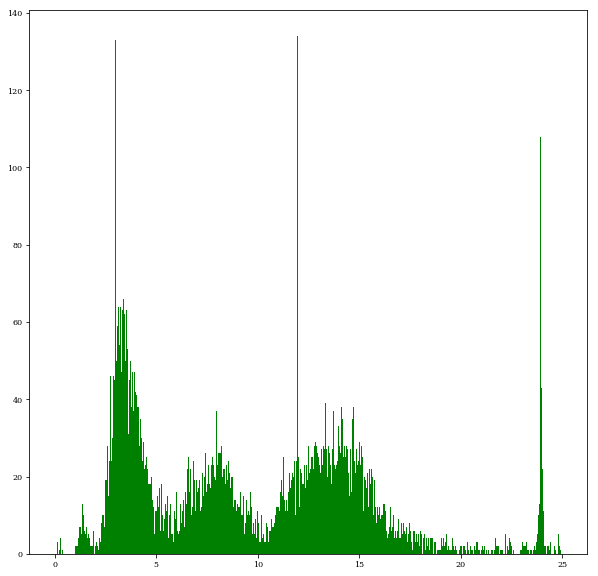

In [11]:
for i in range(len(data.ids)):
    # get the data and best-fit angular frequency
    t, y, dy = data[data.ids[i]].T
    omega, power = results[data.ids[i]]
    omega_best[i] = omega[np.argmax(power)]
    #print(" - omega_0 = %.10g" % omega_best[i])

# Plot the histogram of periods
period = 2*np.pi/omega_best*24

fig = plt.figure(figsize=(10,10))
plt.hist(period, bins=500, range=(0,25), color='g');

The period of these stars can be grouped in three parts. 